In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
import pandas as pd
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [16]:
df = df.dropna()

In [17]:
X = df
X = X.drop('stroke',axis = 1)
X = X.drop('id',axis = 1)
y = df['stroke']

In [18]:
X = pd.get_dummies(X,columns=['gender','work_type','smoking_status','ever_married','Residence_type'])
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
0,67.0,0,1,228.69,36.6,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1
2,80.0,0,1,105.92,32.5,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0
3,49.0,0,0,171.23,34.4,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0
5,81.0,0,0,186.21,29.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1
5107,35.0,0,0,82.99,30.6,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0


In [19]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
X[['avg_glucose_level','bmi']] = StandardScaler().fit_transform(X[['avg_glucose_level','bmi']])
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
0,67.0,0,1,2.777698,0.981345,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1
2,80.0,0,1,0.013842,0.459269,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0
3,49.0,0,0,1.484132,0.701207,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1
4,79.0,1,0,1.549193,-0.623083,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0
5,81.0,0,0,1.821368,0.013595,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,-0.050094,-1.310695,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0
5106,81.0,0,0,0.447882,1.414286,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1
5107,35.0,0,0,-0.502369,0.217332,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0
5108,51.0,0,0,1.372920,-0.419346,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0


In [20]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_res, y_res = sm.fit_resample(X,y)
y_res.value_counts()

1    4700
0    4700
Name: stroke, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.2)

In [9]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1850    1]
 [ 243 1666]]


0.9351063829787234

Text(0.5, 257.44, 'Predicted label')

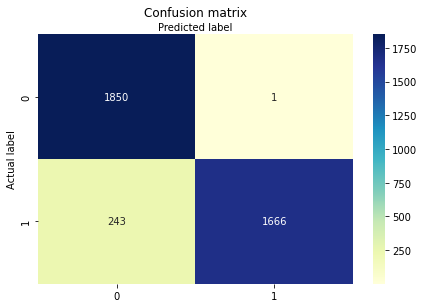

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

import matplotlib.pyplot as plt
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1851
           1       1.00      0.87      0.93      1909

    accuracy                           0.94      3760
   macro avg       0.94      0.94      0.93      3760
weighted avg       0.94      0.94      0.93      3760

